### Add package to Python path

In [3]:
import sys
sys.path.append('/home/guilherme/Projects/ST7/propagation-code-optimization') # change this

### Get data from logs

Hill Climbing

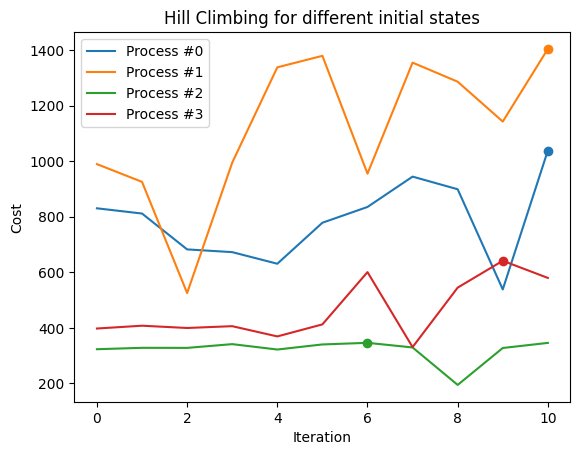

In [36]:
# kangaroo hill climbing
# 4 nodes in parallel
from optimizer.logger import log_to_list
from matplotlib import pyplot as plt

data_list = log_to_list("data/cmd_0.log")

# separate each list
procnum = [0, 1, 2, 3]
lists = [[] for i in procnum]
for data in data_list:
    for i in procnum:
        if data['Me'] == str(i):
            lists[i].append(data)

# get cost vectors
for Me in procnum:
    y[Me] = [float(lists[Me][i]['Cost']) for i in range(0, len(lists[Me]))]

# plot: cost vs iteration
x = [i for i in range(0, len(y[Me]))]
for Me in procnum:
    plt.plot(x, y[Me], label=f"Process #{Me}")
    best_cost = max(y[Me])
    plt.scatter(x[y[Me].index(best_cost)], best_cost)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Hill Climbing for different initial states")
plt.show()

Greedy Hill Climbing

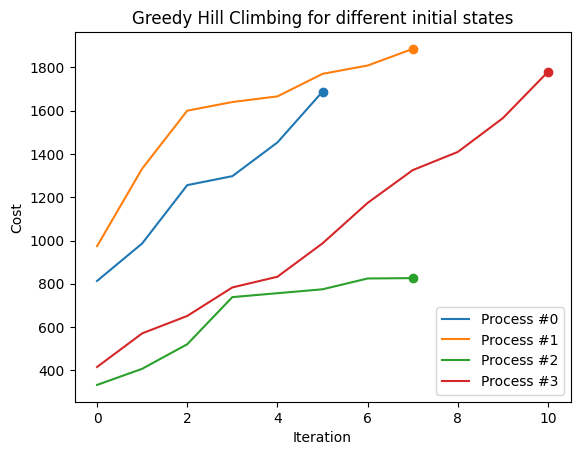

In [38]:
# kangaroo greedy hill climbing
# 4 nodes in parallel
from optimizer.logger import log_to_list
from matplotlib import pyplot as plt

data_list = log_to_list("data/cmd_1.log")

# separate each list
procnum = [0, 1, 2, 3]
lists = [[] for i in procnum]
for data in data_list:
    for i in procnum:
        if data['Me'] == str(i):
            lists[i].append(data)

# get cost vectors
for Me in procnum:
    y[Me] = [float(lists[Me][i]['Cost']) for i in range(0, len(lists[Me]))]

# plot: cost vs iteration
for Me in procnum:
    x[Me] = [i for i in range(0, len(y[Me]))]

for Me in procnum:
    plt.plot(x[Me], y[Me], label=f"Process #{Me}")
    best_cost = max(y[Me])
    plt.scatter(x[Me][y[Me].index(best_cost)], best_cost)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Greedy Hill Climbing for different initial states")
plt.show()

Greedy Hill Climbing w/ Tabu List

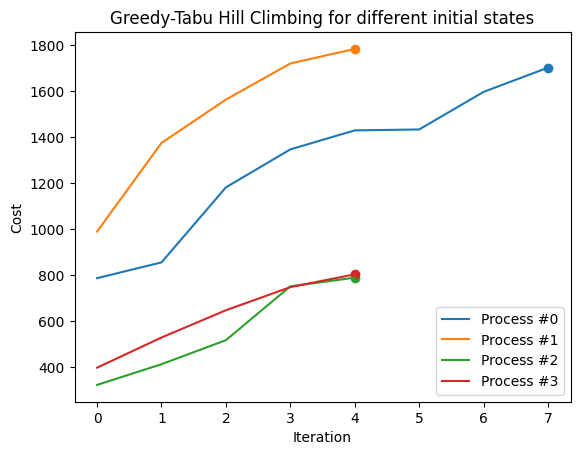

In [39]:
# kangaroo tabu greedy hill climbing
# 4 nodes in parallel
from optimizer.logger import log_to_list
from matplotlib import pyplot as plt

data_list = log_to_list("data/cmd_2.log")

# separate each list
procnum = [0, 1, 2, 3]
lists = [[] for i in procnum]
for data in data_list:
    for i in procnum:
        if data['Me'] == str(i):
            lists[i].append(data)

# get cost vectors
for Me in procnum:
    y[Me] = [float(lists[Me][i]['Cost']) for i in range(0, len(lists[Me]))]

# plot: cost vs iteration
for Me in procnum:
    x[Me] = [i for i in range(0, len(y[Me]))]

for Me in procnum:
    plt.plot(x[Me], y[Me], label=f"Process #{Me}")
    best_cost = max(y[Me])
    plt.scatter(x[Me][y[Me].index(best_cost)], best_cost)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Greedy-Tabu Hill Climbing for different initial states")
plt.show()

Simulated Annealing

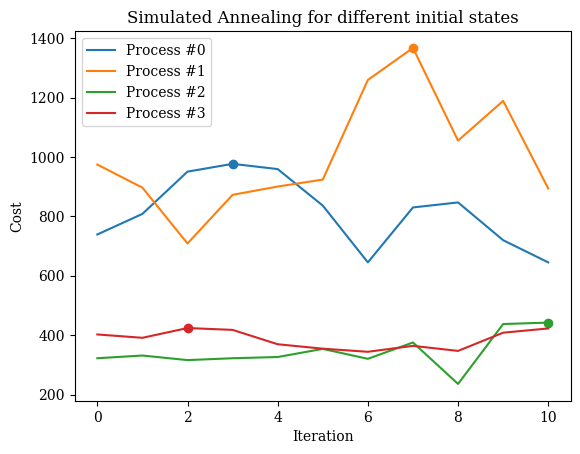

In [15]:
# kangaroo tabu greedy hill climbing
# 4 nodes in parallel
from optimizer.logger import log_to_list
from matplotlib import pyplot as plt

data_list = log_to_list("data/cmd_3.log")

# separate each list
procnum = [0, 1, 2, 3]
lists = [[] for i in procnum]
for data in data_list:
    for i in procnum:
        if data['Me'] == str(i):
            lists[i].append(data)

# get cost vectors
y = [[] for i in procnum]
for Me in procnum:
    y[Me] = [float(lists[Me][i]['Cost']) for i in range(0, len(lists[Me]))]

# plot: cost vs iteration
x = [[] for i in procnum]
for Me in procnum:
    x[Me] = [i for i in range(0, len(y[Me]))]

for Me in procnum:
    plt.plot(x[Me], y[Me], label=f"Process #{Me}")
    best_cost = max(y[Me])
    plt.scatter(x[Me][y[Me].index(best_cost)], best_cost)
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Simulated Annealing for different initial states")
plt.show()

Curious Simulated Annealing

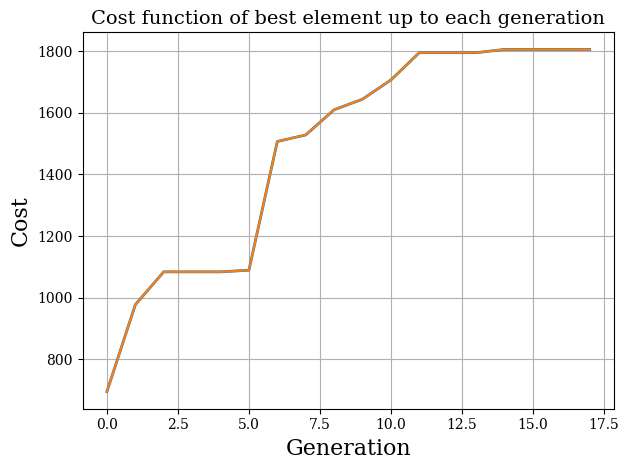

In [14]:
# curious simulatd annaling (cumulated)
# 4 nodes in parallel
from optimizer.logger import log_to_list
from matplotlib import pyplot as plt

data_list = log_to_list("data/cmd_4.log")

# separate each list
procnum = [0, 1, 2, 3]
lists = [[] for i in procnum]
for data in data_list:
    for i in procnum:
        if data['Me'] == str(i):
            lists[i].append(data)

# get cost vectors
costs = [[] for i in procnum]
for Me in procnum:
    costs[Me] = [float(lists[Me][i]['Cost']) for i in range(0, len(lists[Me]))]


# get iteration number
k = [[] for i in procnum]
for Me in procnum:
    k[Me] = [int(lists[Me][i]['k']) for i in range(0, len(lists[Me]))]
    
max_k = max([max(k[Me]) for Me in procnum])

# ge best from each generation
y = [0 for i in range(max_k + 1)]
for Me in procnum:
    for i in range(0, len(lists[Me])):
        current_k = k[Me][i]
        y[current_k] = max(y[current_k], costs[Me][i])

        
# (optional) cumulative function
for current_k in range(1, max_k + 1):
    y[current_k] = max(y[current_k], y[current_k - 1])

x = range(max_k + 1)
                   
# plt.rc('text', usetex=True)
plt.rcParams.update({'font.family': 'serif'})
# plt.rcParams.update({'font.size':16})
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.plot(x, y, linewidth=2)
ax1.grid(True)
ax1.set_title('Cost function of best element up to each generation', fontsize=14)
ax1.set_ylabel('Cost', fontsize=16)
ax1.set_xlabel('Generation', fontsize=16)
plt.tight_layout()
plt.plot(x, y)
#plt.savefig('myGraph.png')
plt.show()

CMA-ES

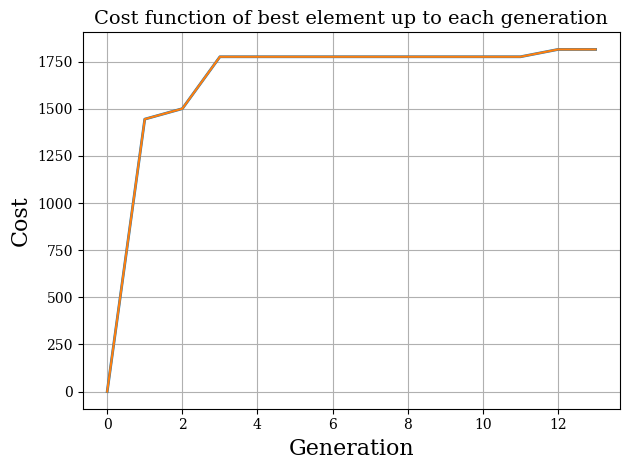

In [17]:
# CMA-ES (cumulated)
# 4 nodes in parallel
from optimizer.logger import log_to_list
from matplotlib import pyplot as plt

data_list = log_to_list("data/cmd_5.log")

# separate each list
procnum = [0, 1, 2, 3]
lists = [[] for i in procnum]
for data in data_list:
    for i in procnum:
        if data['Me'] == str(i):
            lists[i].append(data)

# get cost vectors
costs = [[] for i in procnum]
for Me in procnum:
    costs[Me] = [float(lists[Me][i]['Cost']) for i in range(0, len(lists[Me]))]


# get iteration number
k = [[] for i in procnum]
for Me in procnum:
    k[Me] = [int(lists[Me][i]['k']) for i in range(0, len(lists[Me]))]
    
max_k = max([max(k[Me]) for Me in procnum])

# ge best from each generation
y = [0 for i in range(max_k + 1)]
for Me in procnum:
    for i in range(0, len(lists[Me])):
        current_k = k[Me][i]
        y[current_k] = max(y[current_k], costs[Me][i])

        
# (optional) cumulative function
for current_k in range(1, max_k + 1):
    y[current_k] = max(y[current_k], y[current_k - 1])

x = range(max_k + 1)
                   
# plt.rc('text', usetex=True)
plt.rcParams.update({'font.family': 'serif'})
# plt.rcParams.update({'font.size':16})
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.plot(x, y, linewidth=2)
ax1.grid(True)
ax1.set_title('Cost function of best element up to each generation', fontsize=14)
ax1.set_ylabel('Cost', fontsize=16)
ax1.set_xlabel('Generation', fontsize=16)
plt.tight_layout()
plt.plot(x, y)
#plt.savefig('myGraph.png')
plt.show()

Efficient Global Optimization

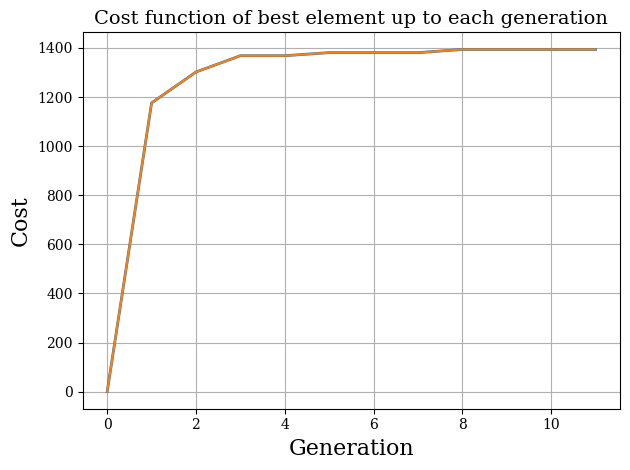

In [4]:
# EGO(cumulated)
# 4 nodes in parallel
from optimizer.logger import log_to_list
from matplotlib import pyplot as plt

data_list = log_to_list("data/cmd_6.log")

# separate each list
procnum = [0, 1, 2, 3]
lists = [[] for i in procnum]
for data in data_list:
    for i in procnum:
        if data['Me'] == str(i):
            lists[i].append(data)

# get cost vectors
costs = [[] for i in procnum]
for Me in procnum:
    costs[Me] = [float(lists[Me][i]['Cost']) for i in range(0, len(lists[Me]))]


# get iteration number
k = [[] for i in procnum]
for Me in procnum:
    k[Me] = [int(lists[Me][i]['k']) for i in range(0, len(lists[Me]))]
    
max_k = max([max(k[Me]) for Me in procnum])

# ge best from each generation
y = [0 for i in range(max_k + 1)]
for Me in procnum:
    for i in range(0, len(lists[Me])):
        current_k = k[Me][i]
        y[current_k] = max(y[current_k], costs[Me][i])

        
# (optional) cumulative function
for current_k in range(1, max_k + 1):
    y[current_k] = max(y[current_k], y[current_k - 1])

x = range(max_k + 1)
                   
# plt.rc('text', usetex=True)
plt.rcParams.update({'font.family': 'serif'})
# plt.rcParams.update({'font.size':16})
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.plot(x, y, linewidth=2)
ax1.grid(True)
ax1.set_title('Cost function of best element up to each generation', fontsize=14)
ax1.set_ylabel('Cost', fontsize=16)
ax1.set_xlabel('Generation', fontsize=16)
plt.tight_layout()
plt.plot(x, y)
#plt.savefig('myGraph.png')
plt.show()